## **xG Rolling Plots** - **_AC Milan_**

In [55]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from highlight_text import fig_text

##### **Data Preparation**

In [56]:
serieA_2021 = pd.read_csv("../data/raw/Fbref-SerieA-2021.csv")
serieA_2021.head()

,Sett.,Giorno,Data,Ora,Casa,xG,Punteggio,xG.1,Ospiti,Spettatori,Stadio,Arbitro,Report partita,Note
0,1.0,Sab,19-09-2020,18:00,Fiorentina,1.9,1–0,0.6,Torino,NaN,Stadio Artemio Franchi,Rosario Abisso,Report partita,NaN
1,1.0,Sab,19-09-2020,20:45,Hellas Verona,1.3,3–0,1.7,Roma,NaN,Stadio Marc'Antonio Bentegodi,Daniele Chiffi,Report partita,Partita assegnata a Hellas Verona
2,1.0,Dom,20-09-2020,12:30,Parma,0.2,0–2,1.6,Napoli,1.0,Stadio Ennio Tardini,Maurizio Mariani,Report partita,NaN
3,1.0,Dom,20-09-2020,15:00,Genoa,2.0,4–1,1.2,Crotone,NaN,Stadio Comunale Luigi Ferraris,Giovanni Ayroldi,Report partita,NaN
4,1.0,Dom,20-09-2020,18:00,Sassuolo,2.3,1–1,1.0,Cagliari,850.0,Stadio Città del Tricolore,Livio Marinelli,Report partita,NaN


In [57]:
serieA_2021.columns

Index(['Sett.', 'Giorno', 'Data', 'Ora', 'Casa', 'xG', 'Punteggio', 'xG.1',
       'Ospiti', 'Spettatori', 'Stadio', 'Arbitro', 'Report partita', 'Note'],
      dtype='object')

In [58]:
serieA_2021 = serieA_2021[['Data', 'Casa', 'xG', 'xG.1', 'Ospiti']]
serieA_2021.head()

,Data,Casa,xG,xG.1,Ospiti
0,19-09-2020,Fiorentina,1.9,0.6,Torino
1,19-09-2020,Hellas Verona,1.3,1.7,Roma
2,20-09-2020,Parma,0.2,1.6,Napoli
3,20-09-2020,Genoa,2.0,1.2,Crotone
4,20-09-2020,Sassuolo,2.3,1.0,Cagliari


In [59]:
serieA_2021.dtypes

Data       object
Casa       object
xG        float64
xG.1      float64
Ospiti     object
dtype: object

In [60]:
# rename columns
serieA_2021.rename(columns={"Data": "Date", "Casa": "HomeTeam", "xG": "xG HomeTeam", "xG.1": "xG AwayTeam", "Ospiti": "AwayTeam"}, inplace=True)
serieA_2021.head(1)

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
0,19-09-2020,Fiorentina,1.9,0.6,Torino


In [61]:
# column date as timestamp
serieA_2021['Date'] = pd.to_datetime(serieA_2021['Date'], format='%d-%m-%Y')

In [62]:
serieA_2021.dtypes

Date           datetime64[ns]
HomeTeam               object
xG HomeTeam           float64
xG AwayTeam           float64
AwayTeam               object
dtype: object

In [63]:
acm_2021 = serieA_2021.loc[(serieA_2021.HomeTeam == 'Milan') | (serieA_2021.AwayTeam == 'Milan')]
acm_2021.head()

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
6,2020-09-21,Milan,2.9,0.9,Bologna
14,2020-09-27,Crotone,0.3,2.4,Milan
30,2020-10-04,Milan,2.0,0.2,Spezia
34,2020-10-17,Inter,2.4,2.3,Milan
52,2020-10-26,Milan,2.6,2.3,Roma


In [64]:
acm_2021.to_csv("../data/Fbref-ACMilan-2021.csv")

Now the same for 2021/22 season

In [65]:
serieA_2122 = pd.read_csv("../data/raw/Fbref-SerieA-2122.csv")
serieA_2122.head(1)

,Sett.,Giorno,Data,Ora,Casa,xG,Punteggio,xG.1,Ospiti,Spettatori,Stadio,Arbitro,Report partita,Note
0,1.0,Sab,21-08-2021,18:30,Hellas Verona,2.1,2–3,1.4,Sassuolo,5.448,Stadio Marc'Antonio Bentegodi,Manuel Volpi,Report partita,NaN


In [66]:
serieA_2122 = serieA_2122[['Data', 'Casa', 'xG', 'xG.1', 'Ospiti']]
serieA_2122.head(1)

,Data,Casa,xG,xG.1,Ospiti
0,21-08-2021,Hellas Verona,2.1,1.4,Sassuolo


In [67]:
# rename columns
serieA_2122.rename(columns={"Data": "Date", "Casa": "HomeTeam", "xG": "xG HomeTeam", "xG.1": "xG AwayTeam", "Ospiti": "AwayTeam"}, inplace=True)
serieA_2122.head(1)

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
0,21-08-2021,Hellas Verona,2.1,1.4,Sassuolo


In [68]:
# column date as timestamp
serieA_2122['Date'] = pd.to_datetime(serieA_2122['Date'], format='%d-%m-%Y')

In [69]:
serieA_2122.dtypes

Date           datetime64[ns]
HomeTeam               object
xG HomeTeam           float64
xG AwayTeam           float64
AwayTeam               object
dtype: object

In [70]:
acm_2122 = serieA_2122.loc[(serieA_2122.HomeTeam == 'Milan') | (serieA_2122.AwayTeam == 'Milan')]
acm_2122.head()

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
9,2021-08-23,Sampdoria,1.0,1.1,Milan
19,2021-08-29,Milan,2.7,0.4,Cagliari
29,2021-09-12,Milan,3.0,0.3,Lazio
41,2021-09-19,Juventus,1.0,0.7,Milan
49,2021-09-22,Milan,1.7,0.7,Venezia


In [71]:
acm_2122.to_csv("../data/Fbref-ACMilan-2122.csv")

##### **Data Modeling**

In [72]:
# append the two dataframes
acm = pd.concat([acm_2021, acm_2122], axis=0)
len(acm)

76

In [73]:
acm

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
6,2020-09-21,Milan,2.9,0.9,Bologna
14,2020-09-27,Crotone,0.3,2.4,Milan
30,2020-10-04,Milan,2.0,0.2,Spezia
34,2020-10-17,Inter,2.4,2.3,Milan
52,2020-10-26,Milan,2.6,2.3,Roma
...,...,...,...,...,...
368,2022-04-24,Lazio,0.6,2.1,Milan
380,2022-05-01,Milan,1.3,0.5,Fiorentina
396,2022-05-08,Hellas Verona,1.2,2.9,Milan
405,2022-05-15,Milan,1.5,0.9,Atalanta


In [74]:
acm.to_csv("../data/ACM-xG.csv")

We need to create a series for both expected goals created and conceded regardless if the team played at home or away. So we'll create a new DataFrame with six columns: _team, opponent, variable, value, venue and date_. Then we'll split our dataframe into two dataframes and then concatenate them back together. By adding the venue column, we could even deepen our analysis to only consider home or away performance.

In [75]:
acm.columns

Index(['Date', 'HomeTeam', 'xG HomeTeam', 'xG AwayTeam', 'AwayTeam'], dtype='object')

In [76]:
home_df = acm.copy()

In [77]:
home_df = home_df.melt(id_vars=['Date', 'HomeTeam', 'AwayTeam'])
home_df['Venue'] = "H"

In [78]:
home_df.rename(columns= {'HomeTeam': 'Team', 'AwayTeam': 'Opponent'}, inplace=True)
home_df.replace({"variable":{'xG HomeTeam': 'xG_for', 'xG AwayTeam': 'xG_ag'}}, inplace=True)

In [79]:
home_df.head()

,Date,Team,Opponent,variable,value,Venue
0,2020-09-21,Milan,Bologna,xG_for,2.9,H
1,2020-09-27,Crotone,Milan,xG_for,0.3,H
2,2020-10-04,Milan,Spezia,xG_for,2.0,H
3,2020-10-17,Inter,Milan,xG_for,2.4,H
4,2020-10-26,Milan,Roma,xG_for,2.6,H


Now the same for away data

In [80]:
away_df = acm.copy()

In [81]:
away_df = away_df.melt(id_vars=['Date', 'AwayTeam', 'HomeTeam'])
away_df['Venue'] = "A"

In [82]:
away_df.rename(columns= {'AwayTeam': 'Team', 'HomeTeam': 'Opponent'}, inplace=True)
away_df.replace({"variable":{'xG AwayTeam': 'xG_for', 'xG HomeTeam': 'xG_ag'}}, inplace=True)

In [83]:
away_df.head()

,Date,Team,Opponent,variable,value,Venue
0,2020-09-21,Bologna,Milan,xG_ag,2.9,A
1,2020-09-27,Milan,Crotone,xG_ag,0.3,A
2,2020-10-04,Spezia,Milan,xG_ag,2.0,A
3,2020-10-17,Milan,Inter,xG_ag,2.4,A
4,2020-10-26,Roma,Milan,xG_ag,2.6,A


Let's join it back together

In [84]:
df = pd.concat([home_df, away_df]).reset_index(drop = True)

In [85]:
df.head()

,Date,Team,Opponent,variable,value,Venue
0,2020-09-21,Milan,Bologna,xG_for,2.9,H
1,2020-09-27,Crotone,Milan,xG_for,0.3,H
2,2020-10-04,Milan,Spezia,xG_for,2.0,H
3,2020-10-17,Inter,Milan,xG_for,2.4,H
4,2020-10-26,Milan,Roma,xG_for,2.6,H


In [86]:
df.dtypes

Date        datetime64[ns]
Team                object
Opponent            object
variable            object
value              float64
Venue               object
dtype: object

Filter the records related to AC Milan and compute the rolling average for the expected goals data

In [87]:
# filter ACM data
df = df[df['Team'] == "Milan"].reset_index(drop=True)
df = df.sort_values(by='Date')

In [88]:
# xG conceded and xG created
Y_for = df[df['variable'] == "xG_for"].reset_index(drop=True)
Y_ag = df[df['variable'] == "xG_ag"].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

In [89]:
# compute the rolling average (min_periods is used for the partial average)
# here we're using a 10 game rolling average
Y_for['value'] = Y_for['value'].rolling(window=10, min_periods=0).mean()
Y_ag['value'] = Y_ag['value'].rolling(window=10, min_periods=0).mean()

In [90]:
Y_for = Y_for[['value']].reset_index(drop=True)
Y_ag = Y_ag[['value']].reset_index(drop=True)

##### **Data Visualization**

In [91]:
from shutil import which
from PIL import Image
import urllib

Text elements and legends

(the first thing you should be aware of is the type of coordinate system you're using to annotate and add text to your visuals. In essence, matplotlib has four different coordinate systems which you can interchange and transform to gain more control in your visual customization journey, these are data, axes, figure and display coordinates)

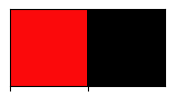

In [92]:
acm_v1 = ['#FB090B','#000000']
sns.palplot(sns.color_palette(acm_v1))

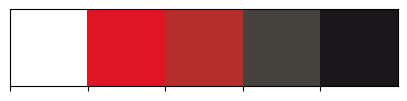

In [93]:
acm_v2 = ['#FFFFFF','#E11624', '#B52E2B', '#46433F', '#1A161A']
sns.palplot(sns.color_palette(acm_v2))

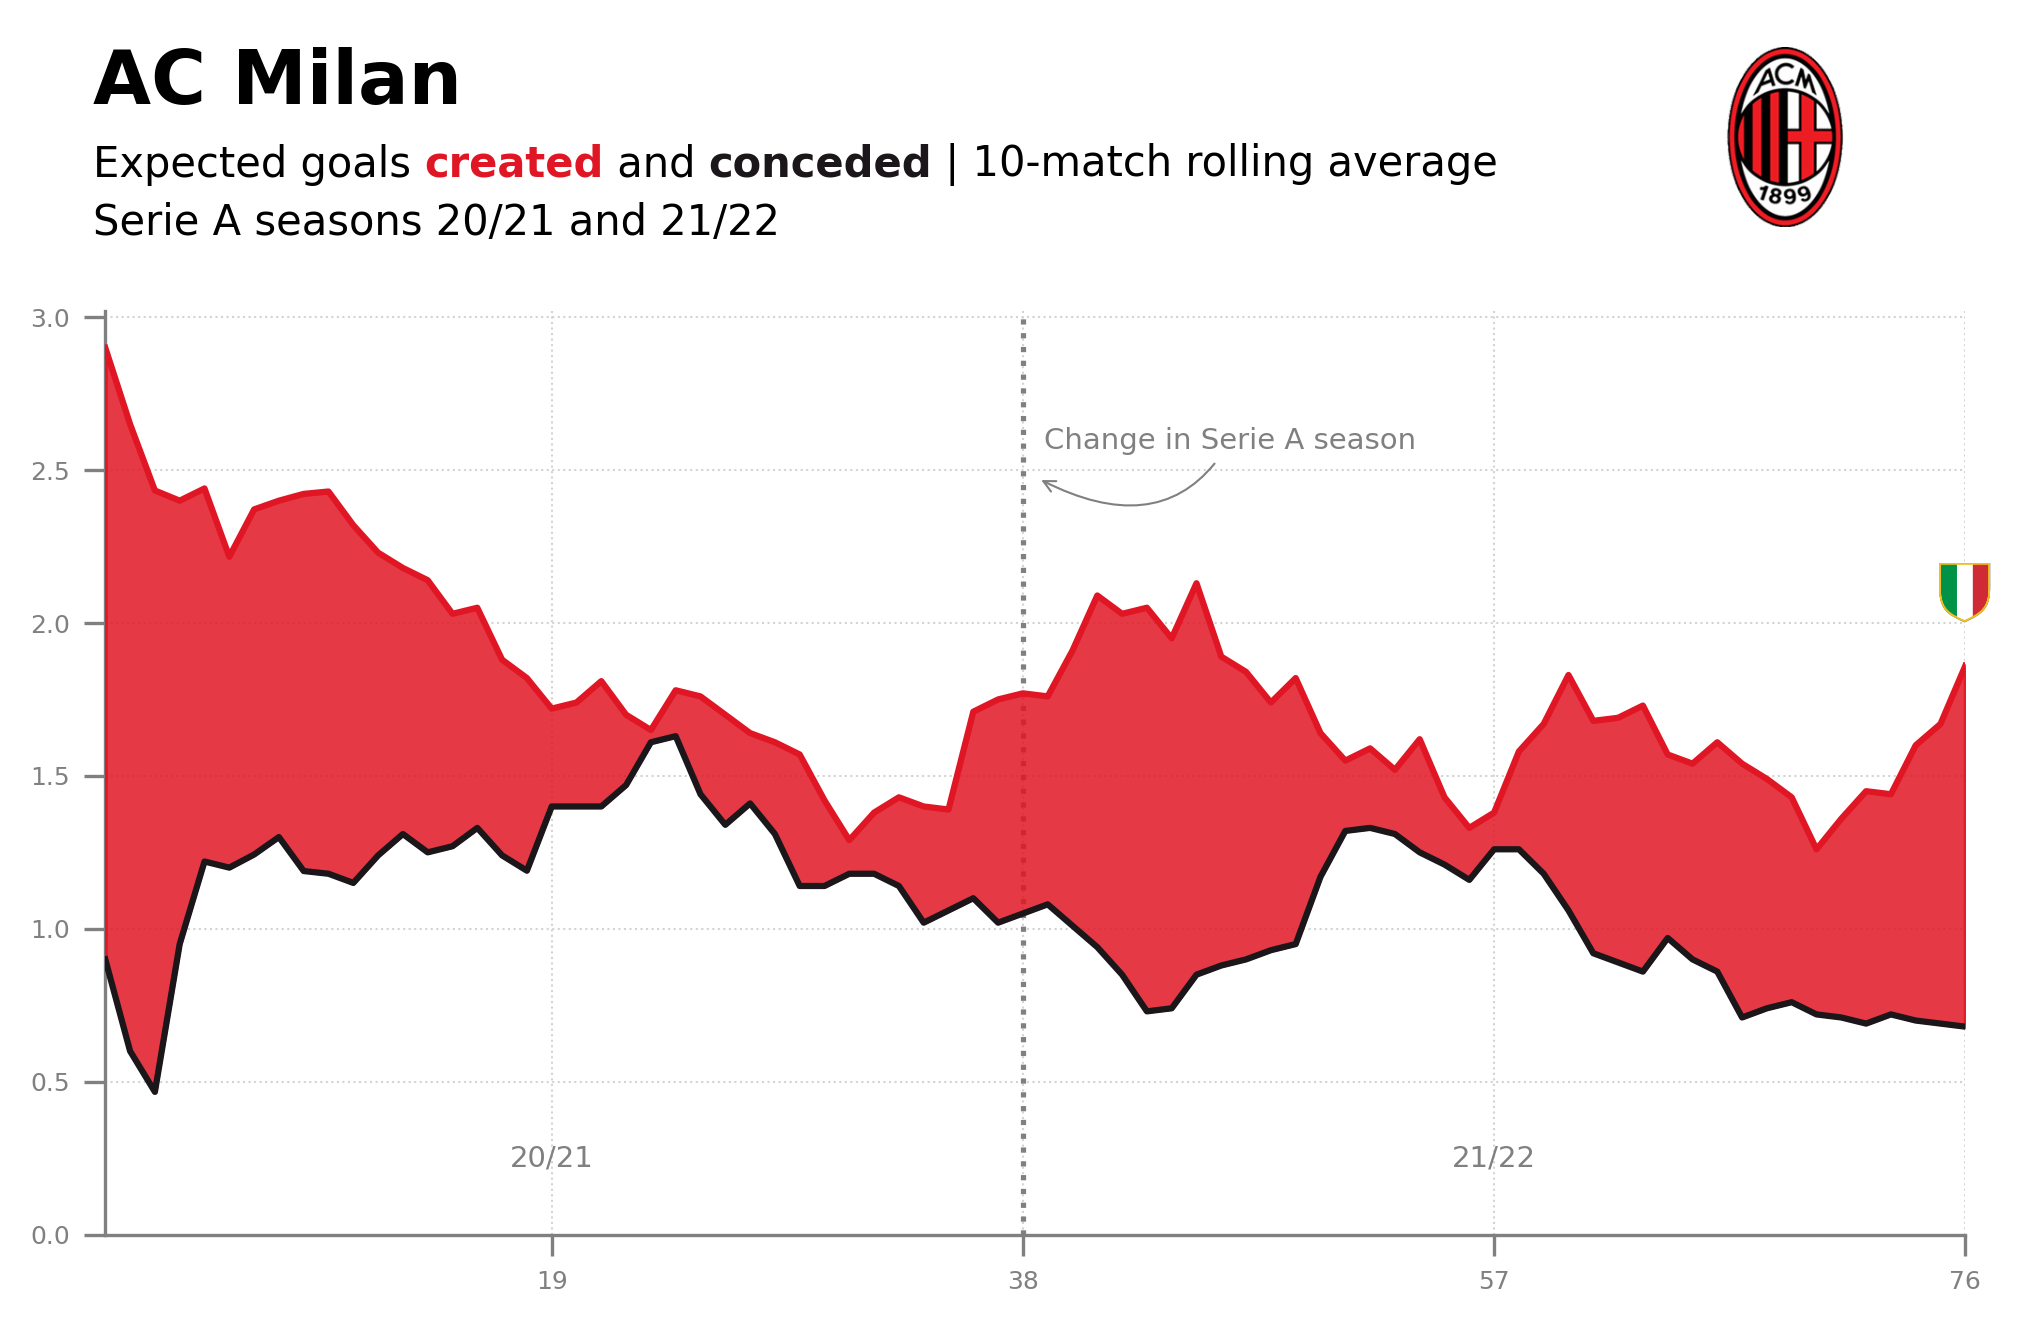

In [94]:
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.5,
    ls = ":",
    color = "lightgrey"
)

# calculate the x-values from matchday 1 to matchday 76
matchdays = range(1, 77)

line_1 = ax.plot(matchdays, Y_for, color="#e11624", zorder=4)
line_2 = ax.plot(matchdays, Y_ag, color="#1a161a", zorder=4)

ax.set_xlim(1, 76)  # set x-axis limits from 1 to 76
ax.set_ylim(0)
# add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# annotation with data coordinates and offset points
ax.annotate(
    xy = (38, 2.5),
    xytext = (5, 5), # adjust text position
    textcoords = 'offset points',
    text = 'Change in Serie A season',
    size = 7,
    color = "grey",
    arrowprops = dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.5,
        connectionstyle="angle3,angleA=60,angleB=-30" # adjust arrow position
    ) # arrow to connect annotation
)

# fill between
ax.fill_between(
    matchdays,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    matchdays,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "AC Milan",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average \nSerie A seasons 20/21 and 21/22",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

# scrape Fotmob's website and plot the image directly into the visual
# create a new axes object to draw the image
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .95, 0.15, 0.15], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8564.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Scudetto.svg/1200px-Scudetto.svg.png"

logo_ax = fig.add_axes([0.875, .62, 0.05, 0.05], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(img_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

for x in [19, 57]:
    if x == 19:
        text = '20/21'
    else:
        text = '21/22'
    text_ = ax.annotate(
        xy=(x,.25),
        text=text,
        color='grey',
        size=7,
        va='center',
        ha='center',
        #weight='bold',
        zorder=4
    )

In [95]:
# save figure
fig.savefig('../figures/ACM-xG-rolling-plot.png', bbox_inches='tight')